In [4]:
import matplotlib.pyplot as plt
import numpy as np
import imageio
import glob
from skimage.filters import gaussian, median, sobel

%matplotlib inline

In [10]:
filenames = glob.glob('/Users/knapen/Downloads/prf_lyon/code/mov/*.png')
filenames = sorted(filenames)

# vid = imageio.get_reader(filename,  'ffmpeg')
imgs = np.array([imageio.imread(fn).sum(-1).T for fn in filenames])

In [9]:
imd.shape

(190, 1920, 1200)

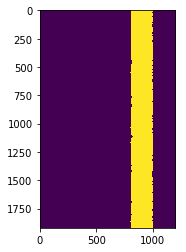

In [11]:
med_img = np.median(imgs,0)
binarized_imgs = np.array([i!=med_img for i in imgs])
plt.imshow(binarized_imgs[20])

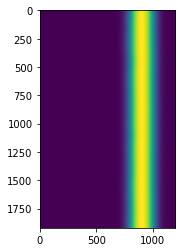

In [12]:
sm_bin_imgs = np.array([gaussian(i, 50) for i in binarized_imgs])
plt.imshow(sm_bin_imgs[20])

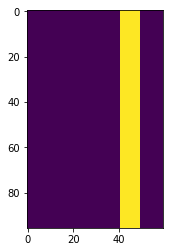

In [13]:
bin_sm_bin_imgs = sm_bin_imgs > 0.5
plt.imshow(bin_sm_bin_imgs[20,::20,::20])

In [14]:
np.save('/Users/knapen/Downloads/prf_lyon/code/dm.npy', bin_sm_bin_imgs.astype(np.uint8))

In [15]:
ssr = 10
sub_sampled_dm = bin_sm_bin_imgs[:,::ssr,::ssr]
sub_sampled_dm_out = np.zeros((sub_sampled_dm.shape[0],
          sub_sampled_dm.shape[1],
          sub_sampled_dm.shape[1]))
border = int((sub_sampled_dm_out.shape[2] - sub_sampled_dm.shape[2])/2)
sub_sampled_dm_out[:,:,border:border+sub_sampled_dm.shape[2]] = sub_sampled_dm

In [16]:
np.save('/Users/knapen/Downloads/prf_lyon/code/dm_out.npy', sub_sampled_dm_out.astype(np.uint8))

In [17]:
sub_sampled_dm_out.shape

(190, 192, 192)